In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

2022-10-22 20:02:28.508793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 20:02:28.508847: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# path to a image: tsb/basedata/training/bad-image/2.jpg
img = image.load_img('/mnt/c/Users/joe19/Desktop/EECS441/tsb/basedata/training/bad-image/2.jpg')
# save the image to the current directory
img.save('2.jpg')


In [4]:

cv2.imread('2.jpg')

array([[[250, 220, 201],
        [250, 220, 201],
        [250, 220, 201],
        ...,
        [229, 204, 184],
        [229, 204, 184],
        [229, 204, 184]],

       [[250, 220, 201],
        [250, 220, 201],
        [249, 219, 200],
        ...,
        [229, 204, 184],
        [229, 204, 184],
        [229, 204, 184]],

       [[250, 220, 201],
        [249, 219, 200],
        [249, 219, 200],
        ...,
        [229, 204, 184],
        [229, 204, 184],
        [229, 204, 184]],

       ...,

       [[  9,  77,  70],
        [  0,  67,  60],
        [  9,  78,  68],
        ...,
        [ 16, 105,  86],
        [ 23, 112,  93],
        [  0,  84,  65]],

       [[ 12,  80,  73],
        [  0,  62,  55],
        [  6,  75,  65],
        ...,
        [ 41, 131, 112],
        [ 51, 141, 122],
        [ 10,  99,  79]],

       [[ 15,  83,  76],
        [  0,  60,  53],
        [  6,  75,  65],
        ...,
        [ 47, 137, 118],
        [ 61, 151, 132],
        [ 16, 105,  85]]

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
training_dataset = train.flow_from_directory('/mnt/c/Users/joe19/Desktop/EECS441/tsb/basedata/training',
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode='binary')

validation_dataset = train.flow_from_directory('/mnt/c/Users/joe19/Desktop/EECS441/tsb/basedata/validation',
                                            target_size=(200,200),
                                            batch_size=3,
                                            class_mode='binary')

Found 15 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [7]:
training_dataset.class_indices

{'bad-image': 0, 'good-image': 1}

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      # The second convolution
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        # The third convolution
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        # The fourth convolution
                                        tf.keras.layers.Flatten(), 
                                        tf.keras.layers.Dense(512,activation='relu'),
                                        tf.keras.layers.Dense(1,activation='sigmoid')])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

2022-10-22 20:07:29.895004: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-10-22 20:07:29.895167: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-N12PEF00): /proc/driver/nvidia/version does not exist
2022-10-22 20:07:29.896956: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['accuracy'])

/home/joehuang/.local/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
model.fit(training_dataset,
            steps_per_epoch=3,
            epochs=30,
            validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 304ms/step - loss: 2.2260e-05 - accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 1s 330ms/step - loss: 1.2535e-05 - accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 1s 322ms/step - loss: 1.0206e-05 - accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 1s 333ms/step - loss: 6.0803e-06 - accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 1s 334ms/step - loss: 4.6466e-06 - accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 1s 257ms/step - loss: 8.9920e-06 - accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 1s 254ms/step - loss: 6.4561e-06 - accuracy: 1.0000
Epoch 8/30
3/3 [==============================] - 1s 295ms/step - loss: 2.8316e-06 - accuracy: 1.0000
Epoch 9/30
3/3 [==============================] - 1s 292ms/step - loss: 2.4030e-06 - accuracy: 1.0000
Epoch 10/30
3/3 [==============================] - 1s 279ms/step - loss: 3.1128e-0

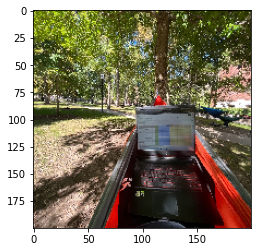

[1.]
good photo


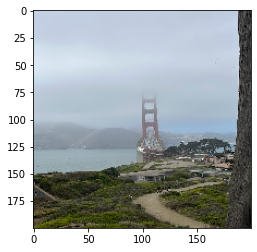

[0.]
bad photo


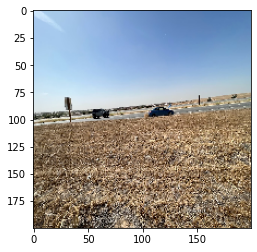

[0.]
bad photo


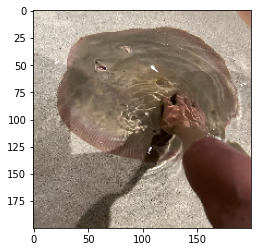

[0.]
bad photo


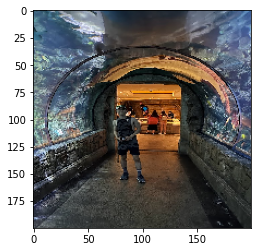

[1.]
good photo


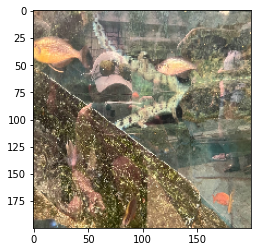

[1.]
good photo


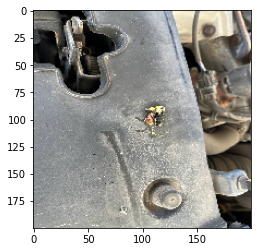

[0.]
bad photo


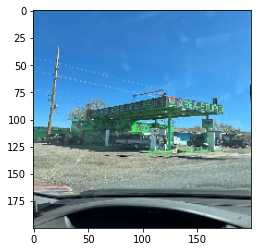

[0.]
bad photo


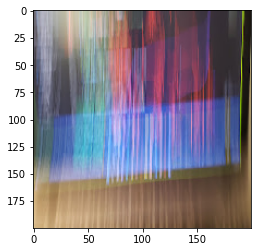

[0.]
bad photo


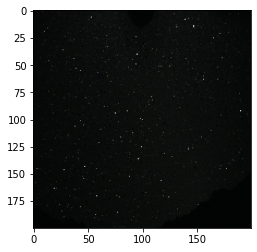

[1.]
good photo


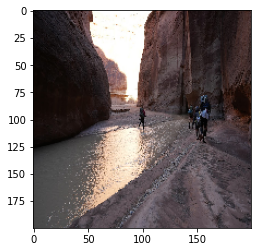

[0.00019428]
good photo


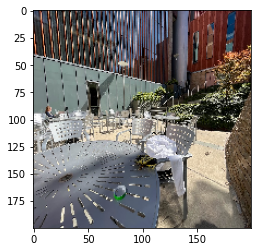

[1.]
good photo


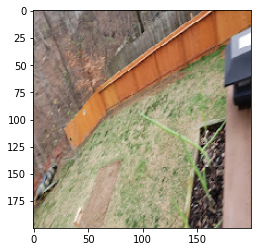

[0.]
bad photo


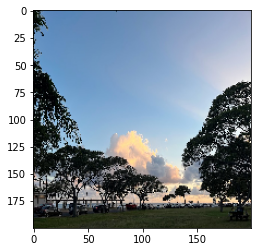

[1.]
good photo


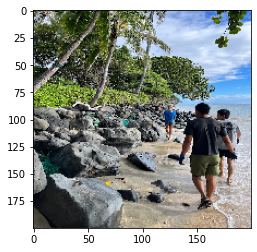

[1.]
good photo


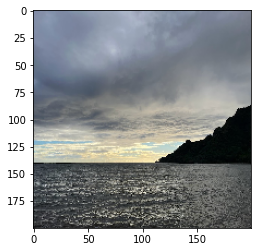

[0.]
bad photo


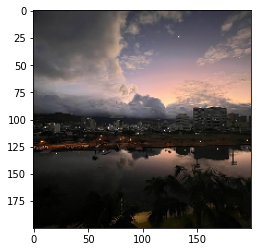

[1.]
good photo


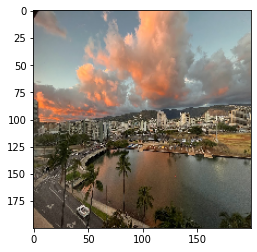

[1.]
good photo


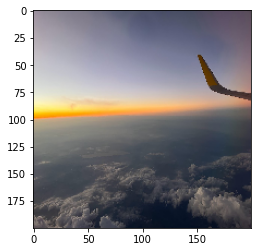

[1.]
good photo


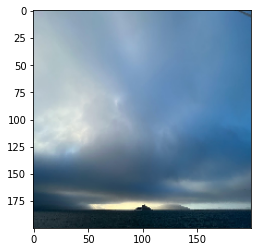

[0.]
bad photo


In [20]:
dir_path = '/mnt/c/Users/joe19/Desktop/EECS441/tsb/basedata/testing'
for img in os.listdir(dir_path):
    img = image.load_img(dir_path + '/' + img, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)

    images = np.vstack([X])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]==0:
        print('bad photo')
    else:
        print('good photo')